In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


In [3]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (
    df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
)

In [5]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [7]:
df_DA['job_posted_month_no'] = df['job_posted_date'].dt.month
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']},10
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']},2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",1
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,3
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}",3


In [9]:
df_DA_explode = df_DA.explode('job_skills')
df_DA_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3


In [13]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', 
                          columns='job_skills', 
                          aggfunc='size',
                          fill_value=0)

In [14]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,asp.net core,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,blazor,c,c#,c++,capacitor,cassandra,centos,chainer,chef,clickup,clojure,cobol,codecommit,cognos,colocation,confluence,cordova,couchbase,couchdb,crystal,css,...,suse,svelte,svn,swift,symfony,symphony,t-sql,tableau,tensorflow,terminal,terraform,theano,tidyr,tidyverse,trello,twilio,typescript,ubuntu,unify,unity,unix,unreal,vb.net,vba,visio,visual basic,vmware,vue,vue.js,watson,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,1,73,33,13,1077,1288,71,443,59,0,389,233,226,1,43,5,0,106,3,0,9,1,264,3,242,1,3,0,161,115,...,0,0,6,36,1,16,182,5596,76,77,26,0,5,11,14,7,14,4,19,33,203,1,19,839,298,121,17,103,4,31,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,0,64,26,11,761,987,41,290,21,1,255,164,145,0,20,0,0,60,0,0,5,0,181,0,163,2,0,0,129,85,...,0,1,1,36,2,7,111,3936,47,62,20,0,0,4,9,3,6,1,9,23,100,2,9,625,224,113,12,132,1,10,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,0,53,29,12,705,887,44,300,14,1,262,136,150,0,28,1,0,76,7,1,6,0,216,1,172,3,0,0,113,106,...,1,0,2,28,6,5,126,4051,45,62,29,0,3,5,8,4,8,1,17,24,113,2,10,595,205,112,12,88,2,16,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,1,28,27,11,720,832,40,270,32,0,231,123,173,0,31,1,0,68,0,3,12,0,181,0,138,0,0,1,100,76,...,0,2,4,38,0,0,124,3776,65,61,19,0,0,6,6,0,8,1,21,19,90,3,12,617,186,106,14,80,2,11,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,0,35,14,12,603,727,31,229,21,1,214,138,127,0,20,3,0,33,0,1,10,1,166,2,137,1,0,0,94,61,...,0,2,8,19,0,2,97,3245,43,50,22,0,0,4,11,1,4,9,29,18,58,1,15,497,196,73,5,57,0,5,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,0,46,29,10,770,915,59,289,30,0,222,146,119,0,25,5,0,54,2,0,11,2,174,3,159,8,6,0,109,100,...,0,1,5,29,5,3,99,3812,53,43,21,1,1,6,9,1,16,0,28,21,98,1,10,624,231,91,12,91,3,15,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,0,42,34,19,778,949,46,256,28,0,239,121,138,0,33,2,0,40,1,0,10,1,196,0,162,2,0,0,107,87,...,0,2,4,19,0,5,154,3928,73,44,22,0,3,9,9,0,12,1,10,25,70,5,18,574,191,80,17,77,3,14,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,3,46,33,28,924,1035,49,315,31,0,334,170,178,0,29,1,0,65,1,3,0,0,222,0,192,1,3,0,94,99,...,0,0,10,23,1,8,164,4533,73,44,17,0,0,7,13,1,12,5,22,36,105,1,7,670,227,84,19,57,1,14,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,0,38,20,31,717,821,53,234,29,0,206,108,135,0,28,1,0,45,2,0,10,0,139,0,160,3,5,1,88,82,...,0,0,7,22,0,2,82,3446,50,26,21,2,0,4,5,4,8,1,9,24,77,3,7,471,149,83,17,44,2,4,4,150,8,945,0,1,0,0,5,25


In [19]:
df_DA_pivot.loc['Total'].sort_values(ascending=False).index
df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,azure,oracle,aws,sql server,go,flow,vba,looker,snowflake,qlik,java,spark,jira,spss,javascript,alteryx,hadoop,sharepoint,outlook,bigquery,dax,gcp,mysql,databricks,sheets,ssis,c,git,pandas,ssrs,...,nuix,firestore,heroku,colocation,svelte,mlr,ionic,react.js,objective-c,hugging face,asp.net core,play framework,clojure,theano,microsoft lists,sqlserver,lisp,qt,pascal,debian,codecommit,blazor,couchdb,kali,haskell,f#,next.js,pulumi,shogun,angular.js,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,1288,1304,1077,1130,1002,954,839,695,597,682,691,626,639,631,578,551,607,499,502,443,408,396,377,341,389,430,389,363,301,386,...,0,4,2,3,0,1,1,1,0,0,1,3,0,0,0,2,1,0,0,1,1,0,0,0,0,1,0,0,3,2,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,987,942,761,739,680,683,625,522,542,575,426,398,417,374,390,448,377,354,360,290,270,275,286,244,232,314,255,208,186,275,...,0,0,0,0,1,1,1,1,0,0,0,2,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,887,820,705,654,651,573,595,530,506,479,411,407,413,405,408,442,387,405,375,300,269,255,319,177,192,255,262,216,223,214,...,0,0,2,1,0,1,1,3,1,1,0,2,1,0,1,1,0,1,1,2,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,832,868,720,686,669,584,617,473,543,497,449,421,375,397,348,413,369,360,345,270,251,292,275,234,240,259,231,220,212,229,...,0,0,2,0,2,1,2,2,0,0,1,2,3,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,727,746,603,603,616,478,497,409,421,459,380,341,323,308,296,310,314,294,275,229,226,254,249,190,241,223,214,217,195,194,...,1,2,3,2,2,0,0,0,3,0,0,0,1,0,1,0,0,1,0,2,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,915,824,770,581,675,622,624,526,549,513,386,381,394,372,360,393,331,333,355,289,256,282,265,258,283,265,222,249,295,225,...,0,1,0,3,1,2,0,2,1,1,0,0,0,1,0,3,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,949,909,778,692,655,634,574,526,527,455,442,413,367,362,388,366,324,310,329,256,285,293,270,279,288,230,239,254,279,230,...,0,0,0,0,2,1,0,1,2,3,0,0,0,0,0,1,1,1,2,0,1,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,1035,990,924,868,713,710,670,554,596,483,475,501,496,439,474,413,358,405,387,315,332,294,267,351,320,292,334,291,285,281,...,0,3,1,0,0,2,0,2,0,1,3,1,3,0,1,1,3,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,821,738,717,600,541,531,471,505,473,396,336,372,370,371,362,317,318,294,320,234,296,251,241,259,242,190,206,210,231,181,...,3,1,0,0,0,0,0,0,2,0,0,0,0,2,2,0,3,0,2,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [20]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,azure,oracle,aws,sql server,go,flow,vba,looker,snowflake,qlik,java,spark,jira,spss,javascript,alteryx,hadoop,sharepoint,outlook,bigquery,dax,gcp,mysql,databricks,sheets,ssis,c,git,pandas,ssrs,...,nuix,firestore,heroku,colocation,svelte,mlr,ionic,react.js,objective-c,hugging face,asp.net core,play framework,clojure,theano,microsoft lists,sqlserver,lisp,qt,pascal,debian,codecommit,blazor,couchdb,kali,haskell,f#,next.js,pulumi,shogun,angular.js,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,1288,1304,1077,1130,1002,954,839,695,597,682,691,626,639,631,578,551,607,499,502,443,408,396,377,341,389,430,389,363,301,386,...,0,4,2,3,0,1,1,1,0,0,1,3,0,0,0,2,1,0,0,1,1,0,0,0,0,1,0,0,3,2,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,987,942,761,739,680,683,625,522,542,575,426,398,417,374,390,448,377,354,360,290,270,275,286,244,232,314,255,208,186,275,...,0,0,0,0,1,1,1,1,0,0,0,2,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,887,820,705,654,651,573,595,530,506,479,411,407,413,405,408,442,387,405,375,300,269,255,319,177,192,255,262,216,223,214,...,0,0,2,1,0,1,1,3,1,1,0,2,1,0,1,1,0,1,1,2,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,832,868,720,686,669,584,617,473,543,497,449,421,375,397,348,413,369,360,345,270,251,292,275,234,240,259,231,220,212,229,...,0,0,2,0,2,1,2,2,0,0,1,2,3,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,727,746,603,603,616,478,497,409,421,459,380,341,323,308,296,310,314,294,275,229,226,254,249,190,241,223,214,217,195,194,...,1,2,3,2,2,0,0,0,3,0,0,0,1,0,1,0,0,1,0,2,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,915,824,770,581,675,622,624,526,549,513,386,381,394,372,360,393,331,333,355,289,256,282,265,258,283,265,222,249,295,225,...,0,1,0,3,1,2,0,2,1,1,0,0,0,1,0,3,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,949,909,778,692,655,634,574,526,527,455,442,413,367,362,388,366,324,310,329,256,285,293,270,279,288,230,239,254,279,230,...,0,0,0,0,2,1,0,1,2,3,0,0,0,0,0,1,1,1,2,0,1,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,1035,990,924,868,713,710,670,554,596,483,475,501,496,439,474,413,358,405,387,315,332,294,267,351,320,292,334,291,285,281,...,0,3,1,0,0,2,0,2,0,1,3,1,3,0,1,1,3,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,821,738,717,600,541,531,471,505,473,396,336,372,370,371,362,317,318,294,320,234,296,251,241,259,242,190,206,210,231,181,...,3,1,0,0,0,0,0,0,2,0,0,0,0,2,2,0,3,0,2,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


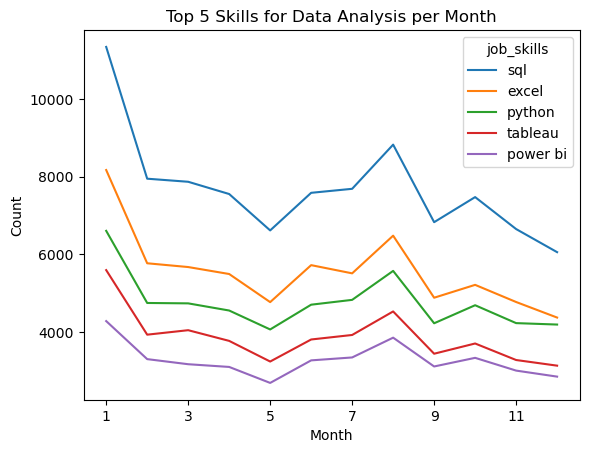

In [24]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Analysis per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()